#  📉 2.Modelling:


In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
#import plotly.express as px
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

In [2]:
# read in the cleaned data

df = pd.read_csv('cleaned_data.csv') 

In [3]:
df.columns

Index(['season', 'datetime', 'home', 'away', 'home_goals', 'away_goals',
       'result', 'total_match_goals'],
      dtype='object')

In [4]:
# converting into a datetime format

df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
df.dtypes

season                       object
datetime             datetime64[ns]
home                         object
away                         object
home_goals                    int64
away_goals                    int64
result                       object
total_match_goals             int64
dtype: object

## Classifying Result Columns:

In [5]:
# label encoding here so that I can apply the logistic regression

df.result.replace(to_replace='H', value=2, inplace=True) # home wins = 2
df.result.replace(to_replace='D',  value=1, inplace=True) # draws = 1
df.result.replace(to_replace='A',  value=0, inplace=True) # away wins = 0
df

,season,datetime,home,away,home_goals,away_goals,result,total_match_goals
0,2000-01,2000-08-19,Charlton,Man City,4,0,2,4
1,2000-01,2000-08-19,Chelsea,West Ham,4,2,2,6
2,2000-01,2000-08-19,Coventry,Middlesbrough,1,3,0,4
3,2000-01,2000-08-19,Derby,Southampton,2,2,1,4
4,2000-01,2000-08-19,Leeds,Everton,2,0,2,2
...,...,...,...,...,...,...,...,...
8284,2021-22,2022-04-09,Aston Villa,Tottenham,0,4,0,4
8285,2021-22,2022-04-10,Brentford,West Ham,2,0,2,2
8286,2021-22,2022-04-10,Leicester,Crystal Palace,2,1,2,3
8287,2021-22,2022-04-10,Norwich,Burnley,2,0,2,2


In [6]:
df = df.drop(columns= ['home_goals', 'away_goals', 'total_match_goals'])
df

,season,datetime,home,away,result
0,2000-01,2000-08-19,Charlton,Man City,2
1,2000-01,2000-08-19,Chelsea,West Ham,2
2,2000-01,2000-08-19,Coventry,Middlesbrough,0
3,2000-01,2000-08-19,Derby,Southampton,1
4,2000-01,2000-08-19,Leeds,Everton,2
...,...,...,...,...,...
8284,2021-22,2022-04-09,Aston Villa,Tottenham,0
8285,2021-22,2022-04-10,Brentford,West Ham,2
8286,2021-22,2022-04-10,Leicester,Crystal Palace,2
8287,2021-22,2022-04-10,Norwich,Burnley,2


In [7]:
# here we see the results for the entire dataset

df.result.value_counts()

2    3803
0    2417
1    2069
Name: result, dtype: int64

## One Hot Encoding:

In [8]:
# one hot encoding all the teams that have played

one_hot = ['home', 'away']
df = pd.get_dummies(df, columns= one_hot, prefix= one_hot)
df

,season,datetime,result,home_Arsenal,home_Aston Villa,home_Birmingham,home_Blackburn,home_Blackpool,home_Bolton,home_Bournemouth,home_Bradford,home_Brentford,home_Brighton,home_Burnley,home_Cardiff,home_Charlton,home_Chelsea,home_Coventry,home_Crystal Palace,home_Derby,home_Everton,home_Fulham,home_Huddersfield,home_Hull,home_Ipswich,home_Leeds,home_Leicester,home_Liverpool,home_Man City,home_Man United,home_Middlesbrough,home_Newcastle,home_Norwich,home_Portsmouth,home_QPR,home_Reading,home_Sheffield United,home_Southampton,home_Stoke,home_Sunderland,home_Swansea,home_Tottenham,home_Watford,home_West Brom,home_West Ham,home_Wigan,home_Wolves,away_Arsenal,away_Aston Villa,away_Birmingham,away_Blackburn,away_Blackpool,away_Bolton,away_Bournemouth,away_Bradford,away_Brentford,away_Brighton,away_Burnley,away_Cardiff,away_Charlton,away_Chelsea,away_Coventry,away_Crystal Palace,away_Derby,away_Everton,away_Fulham,away_Huddersfield,away_Hull,away_Ipswich,away_Leeds,away_Leicester,away_Liverpool,away_Man City,away_Man United,away_Middlesbrough,away_Newcastle,away_Norwich,away_Portsmouth,away_QPR,away_Reading,away_Sheffield United,away_Southampton,away_Stoke,away_Sunderland,away_Swansea,away_Tottenham,away_Watford,away_West Brom,away_West Ham,away_Wigan,away_Wolves
0,2000-01,2000-08-19,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000-01,2000-08-19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2000-01,2000-08-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000-01,2000-08-19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2000-01,2000-08-19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,2021-22,2022-04-09,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8285,2021-22,2022-04-10,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8286,2021-22,2022-04-10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8287,2021-22,2022-04-10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Train/Test Split:

In [9]:
# just ensuring the encoding was run correctly

df.columns

Index(['season', 'datetime', 'result', 'home_Arsenal', 'home_Aston Villa',
       'home_Birmingham', 'home_Blackburn', 'home_Blackpool', 'home_Bolton',
       'home_Bournemouth', 'home_Bradford', 'home_Brentford', 'home_Brighton',
       'home_Burnley', 'home_Cardiff', 'home_Charlton', 'home_Chelsea',
       'home_Coventry', 'home_Crystal Palace', 'home_Derby', 'home_Everton',
       'home_Fulham', 'home_Huddersfield', 'home_Hull', 'home_Ipswich',
       'home_Leeds', 'home_Leicester', 'home_Liverpool', 'home_Man City',
       'home_Man United', 'home_Middlesbrough', 'home_Newcastle',
       'home_Norwich', 'home_Portsmouth', 'home_QPR', 'home_Reading',
       'home_Sheffield United', 'home_Southampton', 'home_Stoke',
       'home_Sunderland', 'home_Swansea', 'home_Tottenham', 'home_Watford',
       'home_West Brom', 'home_West Ham', 'home_Wigan', 'home_Wolves',
       'away_Arsenal', 'away_Aston Villa', 'away_Birmingham', 'away_Blackburn',
       'away_Blackpool', 'away_Bolton', 'away

In [10]:
# assigning the home and away teams as feature columns

feature_cols = list(set(df.columns) - set(['season','datetime','result']))

In [11]:
# assigning the result as target and home/away teams as objects

y = df['result']
X = df[feature_cols]

In [12]:
df.season.unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20', '2020-21', '2021-22'], dtype=object)

In [13]:
#train test splitting- with the current season as the test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= len(df[df['season']== '2021-22' ]), random_state = 42, shuffle= False)

In [14]:
# fitting the logistic regression model

lg_reg = LogisticRegression(random_state = 0)
lg_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
# the score on the test data

lg_reg.score(X_test, y_test)

0.5275080906148867

In [16]:
# creating a prediction variable on the test

lg_y_pred = lg_reg.predict(X_test)

Text(33.0, 0.5, 'True labels')

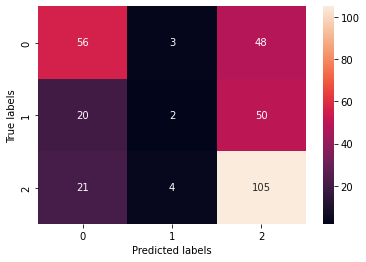

In [17]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, lg_y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True,fmt='d')
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')

In [18]:
# here we can see the results- need some improvement

print(classification_report(y_test, lg_y_pred))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       107
           1       0.22      0.03      0.05        72
           2       0.52      0.81      0.63       130

    accuracy                           0.53       309
   macro avg       0.44      0.45      0.41       309
weighted avg       0.47      0.53      0.47       309



# Naive Bayes:

Naive Bayes is **suitable for solving multi-class prediction problems**. If its assumption of the independence of features holds true, it can perform better than other models and requires much less training data. Naive Bayes is better suited for categorical input variables than numerical variables.

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
# fitting the model

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [21]:
# unfortunately the score hasn't improved using Naive Bayes

nb.score(X_test, y_test)

0.5242718446601942

In [22]:
X_test.columns

Index(['away_Southampton', 'away_Huddersfield', 'home_Bradford',
       'away_Norwich', 'away_Sheffield United', 'home_Burnley', 'home_Hull',
       'home_Watford', 'away_Man City', 'home_Norwich', 'home_Brentford',
       'home_Man City', 'home_Aston Villa', 'away_Portsmouth',
       'home_Bournemouth', 'away_Wigan', 'home_Huddersfield',
       'away_Middlesbrough', 'away_Bournemouth', 'away_Sunderland',
       'home_Leeds', 'home_Man United', 'home_Cardiff', 'away_Coventry',
       'away_Crystal Palace', 'away_Cardiff', 'away_Newcastle',
       'away_Brentford', 'away_Everton', 'away_Swansea', 'away_Liverpool',
       'home_Blackpool', 'away_Bradford', 'away_Stoke', 'away_Tottenham',
       'away_Leicester', 'away_Charlton', 'away_Fulham', 'away_Reading',
       'home_Liverpool', 'home_Middlesbrough', 'home_Ipswich',
       'home_Crystal Palace', 'home_Wigan', 'away_Leeds', 'away_Watford',
       'home_Blackburn', 'home_QPR', 'home_Reading', 'home_Stoke',
       'home_West Brom', 'ho

In [23]:
# here we save a new new y_prediction for naive bayes on the test data

nb_y_pred = nb.predict(X_test)

Text(33.0, 0.5, 'True labels')

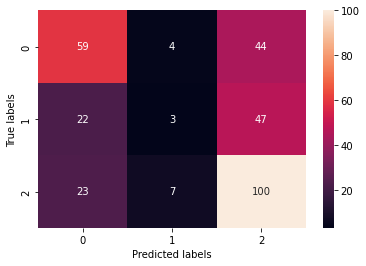

In [24]:
# Making the Confusion Matrix

cm2 = confusion_matrix(y_test, nb_y_pred)
ax= plt.subplot()
sns.heatmap(cm2, annot=True,fmt='d')
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')

In [25]:
# this is the logistic regression report for comparison

print(classification_report(y_test, lg_y_pred))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       107
           1       0.22      0.03      0.05        72
           2       0.52      0.81      0.63       130

    accuracy                           0.53       309
   macro avg       0.44      0.45      0.41       309
weighted avg       0.47      0.53      0.47       309



In [26]:
# this is the naive bayes report- we can see its very similar
# opting to use naive bayes: has higher bias, but lower variance

print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       107
           1       0.21      0.04      0.07        72
           2       0.52      0.77      0.62       130

    accuracy                           0.52       309
   macro avg       0.44      0.45      0.42       309
weighted avg       0.47      0.52      0.47       309



In [27]:
# creating prediction probabilties of the three outcomes 

total = list(nb.predict_proba(X))

df['home_win'] = pd.Series([x[2] for x in total])
df['draw'] = pd.Series([x[1] for x in total])
df['away_win'] = pd.Series([x[0] for x in total])


In [28]:
# create a new prediction column that returns the most probable of the three outcomes

def max_position(row):
    my_list = [row['away_win'], row['draw'], row['home_win']]
    maximum = max(my_list)
    position = my_list.index(maximum)
    return position

df['pred'] = df.apply(max_position, axis = 1)

df['pred'].value_counts()

2    5766
0    2345
1     178
Name: pred, dtype: int64

In [29]:
# classification report of the predicted outcome vs actual result

print(classification_report(df['result'], df['pred']))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      2417
           1       0.38      0.03      0.06      2069
           2       0.55      0.83      0.66      3803

    accuracy                           0.53      8289
   macro avg       0.48      0.45      0.41      8289
weighted avg       0.49      0.53      0.46      8289



## Home Advantage:

In my EDA, I worked out the probability of teams winning, drawing or losing at home over the entire premier league dataset. It could be useful to add this to the naive bayes probability and see if it improves my model further:

In [30]:
# using the EPL statisitics of Home/away/draw probabitilies and applying to our probs:
# home win = 45.76 %
# away win = 28.42%
# draw = 25.81%

df['adj_hw'] = df['home_win'] * (((45.76-33.33) + 100)/100)
df['adj_aw'] = df['away_win'] * (((28.42-33.33) + 100)/100)
df['adj_d'] = df['draw'] * (((25.81-33.33) + 100)/100)
df.tail()

,season,datetime,result,home_Arsenal,home_Aston Villa,home_Birmingham,home_Blackburn,home_Blackpool,home_Bolton,home_Bournemouth,home_Bradford,home_Brentford,home_Brighton,home_Burnley,home_Cardiff,home_Charlton,home_Chelsea,home_Coventry,home_Crystal Palace,home_Derby,home_Everton,home_Fulham,home_Huddersfield,home_Hull,home_Ipswich,home_Leeds,home_Leicester,home_Liverpool,home_Man City,home_Man United,home_Middlesbrough,home_Newcastle,home_Norwich,home_Portsmouth,home_QPR,home_Reading,home_Sheffield United,home_Southampton,home_Stoke,home_Sunderland,home_Swansea,home_Tottenham,home_Watford,home_West Brom,home_West Ham,home_Wigan,home_Wolves,away_Arsenal,away_Aston Villa,away_Birmingham,away_Blackburn,away_Blackpool,away_Bolton,away_Bournemouth,away_Bradford,away_Brentford,away_Brighton,away_Burnley,away_Cardiff,away_Charlton,away_Chelsea,away_Coventry,away_Crystal Palace,away_Derby,away_Everton,away_Fulham,away_Huddersfield,away_Hull,away_Ipswich,away_Leeds,away_Leicester,away_Liverpool,away_Man City,away_Man United,away_Middlesbrough,away_Newcastle,away_Norwich,away_Portsmouth,away_QPR,away_Reading,away_Sheffield United,away_Southampton,away_Stoke,away_Sunderland,away_Swansea,away_Tottenham,away_Watford,away_West Brom,away_West Ham,away_Wigan,away_Wolves,home_win,draw,away_win,pred,adj_hw,adj_aw,adj_d
8284,2021-22,2022-04-09,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.317428,0.294054,0.388518,0,0.356884,0.369442,0.271941
8285,2021-22,2022-04-10,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.370150,0.353140,0.276711,2,0.416159,0.263124,0.326584
8286,2021-22,2022-04-10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.440203,0.252910,0.306887,2,0.494920,0.291819,0.233891
8287,2021-22,2022-04-10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.424737,0.267871,0.307391,2,0.477532,0.292298,0.247728
8288,2021-22,2022-04-10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.462989,0.168380,0.368631,2,0.520538,0.350531,0.155718


In [31]:
# create a new adjusted prediction column that is the most probable of the adjusted probabilities

def adj_max_position(row):
  my_list = [row['adj_aw'], row['adj_d'], row['adj_hw']] # the three outcomes
  maximum = max(my_list) # takes the highest of the three outcomes
  position = my_list.index(maximum)
    # uses indexing to return correct value for highest probability
    # e.g. if home win is highest, position = 2 as its index = 2, and 2 is also the value for home wins
  return position

df['adj_pred'] = df.apply(adj_max_position, axis = 1) # applying to new adjusted pred column

df['adj_pred'].value_counts()

2    6305
0    1936
1      48
Name: adj_pred, dtype: int64

Below we can clearly see that applying the overall premier league' s home/draw/away win probability doesn't improve the model and therefore isn't worth adding as an extra feature. Back to the drawing board...

In [32]:
# this is the original report
print(classification_report(df['result'], df['pred']))

# this is the adjusted report- no improvement
print(classification_report(df['result'], df['adj_pred']))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      2417
           1       0.38      0.03      0.06      2069
           2       0.55      0.83      0.66      3803

    accuracy                           0.53      8289
   macro avg       0.48      0.45      0.41      8289
weighted avg       0.49      0.53      0.46      8289

              precision    recall  f1-score   support

           0       0.53      0.42      0.47      2417
           1       0.42      0.01      0.02      2069
           2       0.53      0.88      0.66      3803

    accuracy                           0.53      8289
   macro avg       0.49      0.44      0.38      8289
weighted avg       0.50      0.53      0.44      8289



Text(33.0, 0.5, 'True labels')

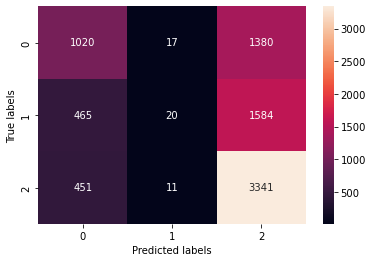

In [33]:
# confusion matrix for adjusted predictions

cm3 = confusion_matrix(df['result'], df['adj_pred'])
ax= plt.subplot()
sns.heatmap(cm3, annot=True, fmt='d', ax=ax)
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')

## Form:

Another feature that could improve the model is taking into account the form of a team. By this I mean, the teams previous few results might help determine the result of their next game, as if they've won their previous few matches they are likely to have momentum and confidence going into the next game. Lets factor this in and see if it improves the model:

In [34]:
# function that takes the last 6 outcomes of the home team:
# by looking at their previous 3 home and 3 away games.
# we look at the previous 3 of each because normally teams alternate between playing home/away
# so looking at the last 3 of each will normally give us the last 6

def test_last_six_home(row, n):
    current = row['datetime'] # assigning a datetime variable
    home_index = list(row[3:47]).index(1) # these are all the columns with home teams
    home = list(df.columns)[3:47][home_index].split('_')[1] # taking just the team name

    filter1 = df['datetime'] < current # this filter will take anything before the fixtures date
    filter_home = (df[f'home_{home}'] == 1)  # filter that takes a teams home games
    filter_away = (df[f'away_{home}'] == 1) # filter that takes a teams away games
    
    home_temp_df = df[filter1 & filter_home]['result'].tail(3) # last three home games
    home_temp_df.replace({2 : 1, 1 : 0, 0: -1}, inplace = True) # changing the values to mean scores
    home_temp_df2 = df[filter1 & filter_away]['result'].tail(3) # last three away games
    home_temp_df2.replace({2 : -1, 1 : 0, 0:1 }, inplace = True) # changing the values to mean scores
    home_temp = pd.concat([home_temp_df, home_temp_df2], axis=0) # concating both together to have a combined score for a teams form

    # creating a multiplier that applies the form score to the original probability
    multiplier = 1 + (n * (sum(home_temp)/100))
    return row['home_win'] * multiplier

# function that takes the last 6 outcomes of the away team:
# by looking at their previous 3 home and 3 away games.
# we look at the previous 3 of each because normally teams alternate between playing home/away
# so looking at the last 3 of each will normally give us the last 6

def test_last_six_away(row, n):
    current = row['datetime'] # assigning a datetime variable
    away_index = list(row[47:91]).index(1) # these are all the columns with away teams
    away = list(df.columns)[47:91][away_index].split('_')[1] # taking just the team name

    filter1 = df['datetime'] < current # this filter will take anything before the fixtures date
    filter_home = (df[f'home_{away}'] == 1)  # filter that takes a teams home games
    filter_away = (df[f'away_{away}'] == 1) # filter that takes a teams away games
    
    away_temp_df = df[filter1 & filter_home]['result'].tail(3) # last three home games
    away_temp_df.replace({2 : 1, 1 : 0, 0: -1}, inplace = True) # changing the values to mean scores
    away_temp_df2 = df[filter1 & filter_away]['result'].tail(3) # last three away games
    away_temp_df2.replace({2 : -1, 1 : 0, 0: 1 }, inplace = True) # changing the values to mean scores
    away_temp = pd.concat([away_temp_df, away_temp_df2], axis=0) # concating both together to have a combined score for a teams form

    # creating a multiplier that applies the form score to the original probability
    multiplier = 1 + (n * (sum(away_temp)/100))
    return row['away_win'] * multiplier


In [35]:
# create a new form adjusted prediction column that is the most probable of the adjusted probabilities

def form_max_position(row):
    my_list = [row['form_away'], row['draw'], row['form_home']] # list of three outcomes
    maximum = max(my_list) # takes the most probable outcome
    position = my_list.index(maximum)
    # uses indexing to return correct value for highest probability
    # e.g. if home win is highest, position = 2 as its index = 2, and 2 is also the value for home wins
    return position

In [36]:
# formlist = []
# for i in np.arange(1, 5, 0.2): 
#     df['form_home'] = df.apply(lambda x: test_last_six_home(x, i), axis=1)
#     df['form_away'] = df.apply(lambda x: test_last_six_away(x, i), axis=1)
#     df['form_pred'] = df.apply(form_max_position, axis = 1) # applying to new form adjusted pred column
#     formlist.append((i, accuracy_score(df['result'], df['form_pred'])))


In [37]:
def last_six_home(row):
    current = row['datetime'] # assigning a datetime variable
    home_index = list(row[3:47]).index(1) # these are all the columns with home teams
    home = list(df.columns)[3:47][home_index].split('_')[1] # taking just the team name

    filter1 = df['datetime'] < current # this filter will take anything before the fixtures date
    filter_home = (df[f'home_{home}'] == 1)  # filter that takes a teams home games
    filter_away = (df[f'away_{home}'] == 1) # filter that takes a teams away games
    
    home_temp_df = df[filter1 & filter_home]['result'].tail(3) # last three home games
    home_temp_df.replace({2 : 1, 1 : 0, 0: -1}, inplace = True) # changing the values to mean scores
    home_temp_df2 = df[filter1 & filter_away]['result'].tail(3) # last three away games
    home_temp_df2.replace({2 : -1, 1 : 0, 0:1 }, inplace = True) # changing the values to mean scores
    home_temp = pd.concat([home_temp_df, home_temp_df2], axis=0) # concating both together to have a combined score for a teams form

    # creating a multiplier that applies the form score to the original probability
    multiplier = 1 + (3 * (sum(home_temp)/100))
    return row['home_win'] * multiplier

# function that takes the last 6 outcomes of the away team:
# by looking at their previous 3 home and 3 away games.
# we look at the previous 3 of each because normally teams alternate between playing home/away
# so looking at the last 3 of each will normally give us the last 6

def last_six_away(row):
    current = row['datetime'] # assigning a datetime variable
    away_index = list(row[47:91]).index(1) # these are all the columns with away teams
    away = list(df.columns)[47:91][away_index].split('_')[1] # taking just the team name

    filter1 = df['datetime'] < current # this filter will take anything before the fixtures date
    filter_home = (df[f'home_{away}'] == 1)  # filter that takes a teams home games
    filter_away = (df[f'away_{away}'] == 1) # filter that takes a teams away games
    
    away_temp_df = df[filter1 & filter_home]['result'].tail(3) # last three home games
    away_temp_df.replace({2 : 1, 1 : 0, 0: -1}, inplace = True) # changing the values to mean scores
    away_temp_df2 = df[filter1 & filter_away]['result'].tail(3) # last three away games
    away_temp_df2.replace({2 : -1, 1 : 0, 0: 1 }, inplace = True) # changing the values to mean scores
    away_temp = pd.concat([away_temp_df, away_temp_df2], axis=0) # concating both together to have a combined score for a teams form

    # creating a multiplier that applies the form score to the original probability
    multiplier = 1 + (3 * (sum(away_temp)/100))
    return row['away_win'] * multiplier

In [38]:
df['form_home'] = df.apply(lambda x: last_six_home(x), axis=1)
df['form_away'] = df.apply(lambda x: last_six_away(x), axis=1)
df['form_pred'] = df.apply(lambda x: form_max_position(x), axis = 1) # applying to new form adjusted pred column

We can see below that the model has improved slightly after taking form into account:

In [39]:
# original report
print(classification_report(df['result'], df['pred']))

# form adjusted report
print(classification_report(df['result'], df['form_pred']))


              precision    recall  f1-score   support

           0       0.50      0.49      0.50      2417
           1       0.38      0.03      0.06      2069
           2       0.55      0.83      0.66      3803

    accuracy                           0.53      8289
   macro avg       0.48      0.45      0.41      8289
weighted avg       0.49      0.53      0.46      8289

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      2417
           1       0.38      0.05      0.08      2069
           2       0.55      0.82      0.66      3803

    accuracy                           0.53      8289
   macro avg       0.48      0.45      0.41      8289
weighted avg       0.50      0.53      0.47      8289



## Team's Home/Away Performance:

We tried applying a home advantage feature from the entire premier league data earlier with no success, however the aim of this project is to try and predict how the current premier league season pans out. Therefore another feature to look at, is every teams probability of winning at home and away. For this, I have decided to look only at the data from the current and previous year's season. Anything prior to these two seasons would not be relevant to how a team is  performing now:

In [40]:
# first lets start by creating a dataframe of the last two seasons

last_two = df.iloc[7600:]

# below I have a dictionary of the home and away teams
# set values to 0 for now:

home_teams =   {"Arsenal": [0],
         "Aston Villa": [0],
           "Brentford": [0],
        "Brighton": [0],
        "Burnley": [0],
        "Chelsea": [0],
        "Crystal Palace": [0],
             "Everton": [0],
             "Fulham": [0],
            "Leeds": [0],
        "Leicester": [0],
        "Liverpool": [0],
            "Man City": [0],
         "Man United": [0],
           "Norwich": [0],
            "Newcastle": [0],
            "Sheffield United": [0],
            "Southampton": [0],
             "Tottenham": [0],
           "Watford": [0],
    "West Brom": [0],
             "West Ham": [0],
    "Wolves": [0]
          }

away_teams =   {"Arsenal": [0],
         "Aston Villa": [0],
           "Brentford": [0],
        "Brighton": [0],
        "Burnley": [0],
        "Chelsea": [0],
        "Crystal Palace": [0],
             "Everton": [0],
             "Fulham": [0],
            "Leeds": [0],
        "Leicester": [0],
        "Liverpool": [0],
            "Man City": [0],
         "Man United": [0],
           "Norwich": [0],
            "Newcastle": [0],
            "Sheffield United": [0],
            "Southampton": [0],
             "Tottenham": [0],
           "Watford": [0],
    "West Brom": [0],
             "West Ham": [0],
    "Wolves": [0]
          }
                     
           
# this function finds every home teams win percentage
def home_percent(team):
    results = last_two[last_two[f'home_{team}'] == 1].groupby('result')[['season']].count().reset_index()
    # results = all the results for each individual home team
    won = results.loc[2, 'season'] # the wins for each individual home team
    played = results['season'].sum() # the total games played for each home team 
    home_percentage = won / played # won games divided by total games = win percentage
    return home_percentage

# this function finds every away teams win percentage
def away_percent(team):
    results = last_two[last_two[f'away_{team}'] == 1].groupby('result')[['season']].count().reset_index()
    # results = all the results for each individual away team
    won = results.loc[0, 'season'] # the wins for each individual away team
    played = results['season'].sum() # the total games played for each away team
    away_percentage = won / played # the total games played for each away team 
    return away_percentage


# looping through home/away teams and applying the functions to return the win percentages
    
for team in home_teams:
    home_teams[team] = home_percent(team) 

for team in away_teams:
    away_teams[team] = away_percent(team) 


 # here we can see the dictionaries have been updated   
print(home_teams)
print(away_teams)

{'Arsenal': 0.5142857142857142, 'Aston Villa': 0.35294117647058826, 'Brentford': 0.375, 'Brighton': 0.2, 'Burnley': 0.20588235294117646, 'Chelsea': 0.48484848484848486, 'Crystal Palace': 0.3142857142857143, 'Everton': 0.38235294117647056, 'Fulham': 0.10526315789473684, 'Leeds': 0.34285714285714286, 'Leicester': 0.5, 'Liverpool': 0.6470588235294118, 'Man City': 0.7058823529411765, 'Man United': 0.4857142857142857, 'Norwich': 0.1875, 'Newcastle': 0.3235294117647059, 'Sheffield United': 0.2631578947368421, 'Southampton': 0.37142857142857144, 'Tottenham': 0.5882352941176471, 'Watford': 0.13333333333333333, 'West Brom': 0.15789473684210525, 'West Ham': 0.5428571428571428, 'Wolves': 0.4}
{'Arsenal': 0.5151515151515151, 'Aston Villa': 0.42857142857142855, 'Brentford': 0.25, 'Brighton': 0.29411764705882354, 'Burnley': 0.20588235294117646, 'Chelsea': 0.6, 'Crystal Palace': 0.2647058823529412, 'Everton': 0.35294117647058826, 'Fulham': 0.15789473684210525, 'Leeds': 0.4, 'Leicester': 0.42424242424

Now we have each teams home/away win percentages, lets apply this to our prediction and see how it affects the model:

In [41]:
# function that applies the team win percentages to the original prediction

def team_multiplier(team, multiplier, prediction, outcome):
    
    # when a given team is playing, apply that teams multiplier to their prediction
    # multiplier = the teams win percentage home/away
    if team == 1:
        return multiplier * prediction
        
    # if they aren't playing then return the outcome (for the team that is playing)
    else:
        return outcome

# we create the two new cols for home/away predictions and set them to 0 to begin
last_two['home_multiply'] = 0
last_two['away_multiply'] = 0

# create a list of home teams
home_last_two = list(home_teams.keys())
# run through the home teams and apply the team_mulitiplier function to create an updated prediction
for team in home_last_two:
    last_two['home_multiply'] = last_two.apply(lambda x: team_multiplier(x[f'home_{team}'], home_teams[team], x['home_win'], x['home_multiply']), axis = 1)

# create a list of away teams
away_last_two = list(away_teams.keys())
# run through the away teams and apply the team_mulitiplier function to create an updated prediction
for team in away_last_two:
    last_two['away_multiply'] = last_two.apply(lambda x: team_multiplier(x[f'away_{team}'], away_teams[team], x['away_win'], x['away_multiply']), axis = 1)

last_two.tail()

,season,datetime,result,home_Arsenal,home_Aston Villa,home_Birmingham,home_Blackburn,home_Blackpool,home_Bolton,home_Bournemouth,home_Bradford,home_Brentford,home_Brighton,home_Burnley,home_Cardiff,home_Charlton,home_Chelsea,home_Coventry,home_Crystal Palace,home_Derby,home_Everton,home_Fulham,home_Huddersfield,home_Hull,home_Ipswich,home_Leeds,home_Leicester,home_Liverpool,home_Man City,home_Man United,home_Middlesbrough,home_Newcastle,home_Norwich,home_Portsmouth,home_QPR,home_Reading,home_Sheffield United,home_Southampton,home_Stoke,home_Sunderland,home_Swansea,home_Tottenham,home_Watford,home_West Brom,home_West Ham,home_Wigan,home_Wolves,away_Arsenal,away_Aston Villa,away_Birmingham,away_Blackburn,away_Blackpool,away_Bolton,away_Bournemouth,away_Bradford,away_Brentford,away_Brighton,away_Burnley,away_Cardiff,away_Charlton,away_Chelsea,away_Coventry,away_Crystal Palace,away_Derby,away_Everton,away_Fulham,away_Huddersfield,away_Hull,away_Ipswich,away_Leeds,away_Leicester,away_Liverpool,away_Man City,away_Man United,away_Middlesbrough,away_Newcastle,away_Norwich,away_Portsmouth,away_QPR,away_Reading,away_Sheffield United,away_Southampton,away_Stoke,away_Sunderland,away_Swansea,away_Tottenham,away_Watford,away_West Brom,away_West Ham,away_Wigan,away_Wolves,home_win,draw,away_win,pred,adj_hw,adj_aw,adj_d,adj_pred,form_home,form_away,form_pred,home_multiply,away_multiply
8284,2021-22,2022-04-09,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.317428,0.294054,0.388518,0,0.356884,0.369442,0.271941,0,0.298382,0.435141,0,0.112033,0.177608
8285,2021-22,2022-04-10,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.370150,0.353140,0.276711,2,0.416159,0.263124,0.326584,2,0.381254,0.285012,2,0.138806,0.118590
8286,2021-22,2022-04-10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.440203,0.252910,0.306887,2,0.494920,0.291819,0.233891,2,0.466615,0.334507,2,0.220101,0.081235
8287,2021-22,2022-04-10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.424737,0.267871,0.307391,2,0.477532,0.292298,0.247728,2,0.361027,0.298170,2,0.079638,0.063286
8288,2021-22,2022-04-10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.462989,0.168380,0.368631,2,0.520538,0.350531,0.155718,2,0.504658,0.434985,2,0.326816,0.210646


In [42]:
# create a new mutliplier adjusted prediction column that returns the most probable outcome

def test_multiply_max_position(row, n):
    my_list = [row['away_multiply'], row['home_multiply']] # list of home and away probabilities
    maximum = max(my_list) # this finds the highest probability out of home and away wins
    # we cannot add draws to the list as these aren't weighted in the same way as home/away wins were
    ## therefore we must calculate probabilities of draws in a different way
    difference = abs(row['away_multiply'] - row['home_multiply']) # calculates difference between home and away wins
    
    # if difference is above the defined metric, return most probable out of home or away wins
    if difference > n: # this number was determined as it outputted best scores
        if maximum == row['away_multiply']:
            return 0 # away win
        else:
            return 2 # home win
    else:
        return 1 # if the difference is less, return a draw as outcome

# last_two['multiply_pred'] = last_two.apply(multiply_max_position, axis = 1)
# # creating a new multiplier adjusted prediction and applying the function

# last_two['multiply_pred'].value_counts()

In [43]:
# multiplylist = []
# for i in np.arange(0,0.1, 0.005): 
#     last_two['multiply_pred'] = last_two.apply(lambda x:  test_multiply_max_position(x, i), axis=1)
#     multiplylist.append((i, accuracy_score(last_two['result'], last_two['multiply_pred'])))

In [44]:
# multiplylist

In [45]:
# create a new mutliplier adjusted prediction column that returns the most probable outcome

def multiply_max_position(row):
    my_list = [row['away_multiply'], row['home_multiply']] # list of home and away probabilities
    maximum = max(my_list) # this finds the highest probability out of home and away wins
    # we cannot add draws to the list as these aren't weighted in the same way as home/away wins were
    ## therefore we must calculate probabilities of draws in a different way
    difference = abs(row['away_multiply'] - row['home_multiply']) # calculates difference between home and away wins
    
    # if difference is above the defined metric, return most probable out of home or away wins
    if difference > 0.025: # this number was determined as it outputted best scores
        if maximum == row['away_multiply']:
            return 0 # away win
        else:
            return 2 # home win
    else:
        return 1 # if the difference is less, return a draw as outcome

last_two['multiply_pred'] = last_two.apply(multiply_max_position, axis = 1)
# creating a new multiplier adjusted prediction and applying the function

last_two['multiply_pred'].value_counts()

2    393
0    224
1     72
Name: multiply_pred, dtype: int64

In [46]:
last_two.columns

Index(['season', 'datetime', 'result', 'home_Arsenal', 'home_Aston Villa',
       'home_Birmingham', 'home_Blackburn', 'home_Blackpool', 'home_Bolton',
       'home_Bournemouth',
       ...
       'adj_hw', 'adj_aw', 'adj_d', 'adj_pred', 'form_home', 'form_away',
       'form_pred', 'home_multiply', 'away_multiply', 'multiply_pred'],
      dtype='object', length=105)

Below we can see that using a teams win percentages for their home and away games, does in fact improve the model more so than the form feature does:

In [47]:
# original report
print(classification_report(last_two['result'], last_two['pred']))

# form adjusted report
print(classification_report(last_two['result'], last_two['form_pred']))

# multiplier adjusted report- that accounts for team's home/away win percentages
print(classification_report(last_two['result'], last_two['multiply_pred']))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54       260
           1       0.40      0.06      0.11       155
           2       0.50      0.80      0.61       274

    accuracy                           0.52       689
   macro avg       0.49      0.45      0.42       689
weighted avg       0.51      0.52      0.47       689

              precision    recall  f1-score   support

           0       0.59      0.50      0.54       260
           1       0.44      0.09      0.15       155
           2       0.50      0.80      0.62       274

    accuracy                           0.53       689
   macro avg       0.51      0.46      0.44       689
weighted avg       0.52      0.53      0.48       689

              precision    recall  f1-score   support

           0       0.59      0.51      0.55       260
           1       0.29      0.14      0.19       155
           2       0.54      0.77      0.64       274

    accuracy        

But why don't we try and feature both form and the team's win percentages to the model:

In [48]:
last_two['form_home_multiply'] = 0
last_two['form_away_multiply'] = 0

for team in home_last_two:
    last_two['form_home_multiply'] = last_two.apply(lambda x: team_multiplier(x[f'home_{team}'], home_teams[team], x['form_home'], x['form_home_multiply']), axis = 1)

for team in away_last_two:
    last_two['form_away_multiply'] = last_two.apply(lambda x: team_multiplier(x[f'away_{team}'], away_teams[team], x['form_away'], x['form_away_multiply']), axis = 1)

In [49]:
def form_multiply_max_position(row):
    my_list = [row['form_away_multiply'], row['form_home_multiply']]
    difference = abs(row['form_away_multiply'] - row['form_home_multiply'])
    maximum = max(my_list)
    if difference > 0.04:
        if maximum == row['form_away_multiply']:
            return 0
        else:
            return 2
    else:
        return 1

last_two['form_multiply_pred'] = last_two.apply(form_multiply_max_position, axis = 1)

last_two['form_multiply_pred'].value_counts()

2    363
0    212
1    114
Name: form_multiply_pred, dtype: int64

In [50]:
print(classification_report(last_two['result'], last_two['pred']))
print(classification_report(last_two['result'], last_two['form_pred']))
print(classification_report(last_two['result'], last_two['multiply_pred']))
print(classification_report(last_two['result'], last_two['form_multiply_pred']))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54       260
           1       0.40      0.06      0.11       155
           2       0.50      0.80      0.61       274

    accuracy                           0.52       689
   macro avg       0.49      0.45      0.42       689
weighted avg       0.51      0.52      0.47       689

              precision    recall  f1-score   support

           0       0.59      0.50      0.54       260
           1       0.44      0.09      0.15       155
           2       0.50      0.80      0.62       274

    accuracy                           0.53       689
   macro avg       0.51      0.46      0.44       689
weighted avg       0.52      0.53      0.48       689

              precision    recall  f1-score   support

           0       0.59      0.51      0.55       260
           1       0.29      0.14      0.19       155
           2       0.54      0.77      0.64       274

    accuracy        

# Final Predictions:

Now we have fine tuned the model,  lets run it on the remaining fixtures this season and see what predictions we get:

In [51]:
fixtures = pd.read_csv("fixtures.csv")

fixtures['datetime'] = pd.to_datetime(fixtures['datetime'], format='%Y-%m-%d')
fixtures.dtypes

ValueError: time data 16-04-22 doesn't match format specified

In [ ]:
X = X.reindex(sorted(X.columns), axis=1)

In [ ]:
X

In [ ]:
nb_final = MultinomialNB()
nb_final.fit(X, y)

In [ ]:
X.columns

In [ ]:
final = fixtures.copy()
one_hot_final = ['home', 'away']
final = pd.get_dummies(final, columns= one_hot_final, prefix= one_hot)

In [ ]:
final = final.drop(columns = ['season', 'datetime'])
final = final.reindex(sorted(final.columns), axis=1)


In [ ]:
final.columns

In [ ]:
cols_to_add = list(X.columns)

for col in cols_to_add:
    if col not in list(final.columns):
        final[f'{col}'] = 0
    else:
        continue
        

final = final.reindex(sorted(final.columns), axis=1)        
final.columns

In [ ]:
nb_pred = nb_final.predict(final)

In [ ]:
# creating prediction probabilties of the three outcomes 

final_total = list(nb_final.predict_proba(final))

final['home_win'] = pd.Series([x[2] for x in final_total])
final['draw'] = pd.Series([x[1] for x in final_total])
final['away_win'] = pd.Series([x[0] for x in final_total])

In [ ]:
# create a new prediction column that returns the most probable of the three outcomes

final['pred'] = final.apply(max_position, axis = 1)

final['pred'].value_counts()

In [ ]:
times = fixtures.drop(columns = ['home', 'away'])
times_final = times.join(final)
times_final

In [ ]:
print(list(last_two.columns))

In [ ]:
print(list(times_final.columns))

In [ ]:
more_cols_to_add = ['result', 'adj_hw', 'adj_aw', 'adj_d', 'adj_pred', 'form_home', 'form_away', 'form_pred',
                    'home_multiply', 'away_multiply', 'multiply_pred', 'form_home_multiply', 'form_away_multiply',
                    'form_multiply_pred']

for col in more_cols_to_add:
    times_final[f'{col}'] = 0

print(list(times_final.columns))

In [ ]:
times_final = times_final.reindex(columns = list(last_two.columns))
print(list(times_final.columns))

In [ ]:
times_final['result'] = 1
times_final['result'].value_counts()

In [ ]:
final_prediction = pd.concat([last_two, times_final], axis =0).reset_index(drop = True)
final_prediction

In [ ]:
final_prediction.columns[47:91]

In [ ]:
# adding the form of a team into account 

final_prediction['form_home'] = final_prediction.apply(lambda x: last_six_home(x), axis=1)
final_prediction['form_away'] = final_prediction.apply(lambda x: last_six_away(x), axis=1)
final_prediction['form_pred'] = final_prediction.apply(lambda x: form_max_position(x), axis = 1) # applying to new form adjusted pred column

In [ ]:
final_prediction['pred'].value_counts()

In [ ]:
final_prediction['form_pred'].value_counts()

In [ ]:
for team in home_last_two:
    final_prediction['form_home_multiply'] = final_prediction.apply(lambda x: team_multiplier(x[f'home_{team}'], home_teams[team], x['form_home'], x['form_home_multiply']), axis = 1)

for team in away_last_two:
    final_prediction['form_away_multiply'] = final_prediction.apply(lambda x: team_multiplier(x[f'away_{team}'], away_teams[team], x['form_away'], x['form_away_multiply']), axis = 1)

In [ ]:
final_prediction['form_multiply_pred'] = final_prediction.apply(form_multiply_max_position, axis = 1)

final_prediction['form_multiply_pred'].value_counts()

In [ ]:
final_prediction[740:]